(successive_over_relaxation)=
# Successive over-relaxation method
```{index} SOR algorithm
```
A very large proportion of the world's supercomputing capacity is dedicated to solving {ref}`PDEs <pde_basic_partial_differentiation>` - climate and weather simulations, aerodynamics, structural simulations, etc.

PDEs describe quantities that vary continuously with respect to a set of independent variables. Computers can only store a finite number of discrete quantities. Therefore, the actual solution can only by approximated.

[Successive over-relaxation (SOR)](https://en.wikipedia.org/wiki/Successive_over-relaxation) is a numerical method for solving a linear system of equations - equations that have a linear comination of differential terms. Coefficients in such equation can be functions of the independent variables but not the dependent ones. For example:
\\[f_1(x,y)\frac{\partial u}{\partial x} +f_2(x,y)\frac{\partial u}{\partial y}+f_3(x,y)u=f_4(x,y).\\]

Linear 2nd order PDEs in 2D can be approximated as
\\[a_{i,j}u_{i+1,j}+b_{i,j}u_{i-1,j}+c_{i,j}u_{i,j+1}+d_{i,j}u_{i,j-1}+e_{i,j}u_{i,j}=f_{i,j},\\]
where prefactors \\(a,b,c,d,e\\) and \\(f\\) are matrices (functions of position).

SOR algorithm is an iterative method of solving linear equations. Iterative methods work by successively reducing the error in the solution. By error, we define the residual between the old and new solution. As we do not know the final solution, we cannot use the error in the dependent variable. The residual at point (\\(i,j\\)) is:
\\[\xi_{i,j}=a_{i,j}u_{i+1,j}+b_{i,j}u_{i-1,j}+c_{i,j}u_{i,j+1}+d_{i,j}u_{i,j-1}+e_{i,j}u_{i,j}-f_{i,j}.\\]

The iterations then continue until the average magnitude of the residual drops a certain value. You may also wish to ensure that the maximum residual is below a set value as well:
\\[\frac{\sum\sum |\xi_{i,j}|}{i_{max}j_{max}}<\xi_{Critical}.\\]

## SOR algorithm

From finite difference approximation:
\\[a_{i,j}u_{i+1,j}^{correct}+b_{i,j}u_{i-1,j}^{correct}+c_{i,j}u_{i,j+1}^{correct}+d_{i,j}u_{i,j-1}^{correct}+e_{i,j}u_{i,j}^{correct}-f_{i,j}=0.\\]

By definition, the residual is:

\\[a_{i,j}u_{i+1,j}^{guess}+b_{i,j}u_{i-1,j}^{guess}+c_{i,j}u_{i,j+1}^{guess}+d_{i,j}u_{i,j-1}^{guess}+e_{i,j}u_{i,j}^{guess}-f_{i,j}=\xi_{i,j}.\\]

If we subtract the residual equation from the finite difference approximation, we get:
\\[\xi_{i,j}= a_{i,j}(u_{i+1,j}^{guess}-u_{i+1,j}^{correct})+b_{i,j}(u_{i-1,j}^{guess}-u_{i-1,j}^{correct})+c_{i,j}(u_{i,j+1}^{guess}-u_{i,j+1}^{correct})+\\\\\\
+d_{i,j}(u_{i,j-1}^{guess}-u_{i,j-1}^{correct})+e_{i,j}(u_{i,j}^{guess}-u_{i,j}^{correct}).\\]

Assuming that error at the central point is more important than the other errors:
\\[u_{i,j}^{correct}\approx u_{i,j}^{guess}-\frac{\xi_{i,j}}{e_{i,j}}.\\]

This approximation can be used to update our estimates:
\\[u_{i,j}^{new}=u_{i,j}^{old}-\omega\frac{\xi_{i,j}}{e_{i,j}},\\]
where \\(\omega\\) is the relaxation factor.

```{admonition} The relaxation factor \\(\omega\\):
* solutions are generally stable for values between 0 and 2
* below 1 it is known us under-relaxation and convergence is always slower
* above 1 convergence can be quicker
* for some systems optimum value of \\(\omega\\) can be obtained theoretically, though generally the best value is found by trial and error
```

### Checker-boarding
SOR is potentially unstable if new values are used in the updating as they become available. To ensure that this doesn't happen, we have to use two arrays, one for new values and one for old values, which uses twice as much memory. 

Alternatively, we can do checker-boarding, where we imagine the solution grid like a chess board. We solve for black squares on one iteration and white squares on another iteration.

```{figure} ../../images/SOR_electrical_current_checker_boarding.PNG
:width: 500px
```

## Solving potential flow with SOR method

### Continuity
Many PDEs express conservation of quantities, e.g. mass, volume, heat, charge, etc. Conservation can be expressed using a continuity equation:
\\[\nabla\cdot\hat{F}+\frac{\partial \phi}{\partial t}=S,\\]
where \\(\hat{F}\\) is the flux of \\(\phi\\) and \\(S\\) is the rate of generation of \\(\phi\\).

At steady state and no generation, the equation can be simplified to:
\\[\nabla\cdot\hat{F}=0.\\]

### Stream functions
Stream functions can be used to represent 2D steady state systems that exhibit continuity. A stream function is a scalar field where flow follows a constant value of the function (or in other words - a constant value of the stream function represents a streamline).

The stream function \\(\psi\\) is related to flux:
\\[F_{x}=\frac{\partial \psi}{\partial y},\quad F_{y}=-\frac{\partial\psi}{\partial x}.\\]

If this is substituted into the steady state continuity equation, you can see that it is always satisfied:
\\[\nabla\cdot\hat{F}=\frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}=\frac{\partial}{\partial x}\Big(\frac{\partial \psi}{\partial y}\Big)+\frac{\partial}{\partial y}\Big(-\frac{\partial \psi}{\partial x}\Big)=0.\\]

### Potential flow
Potential flow is when the flux of a quantity is proportional to the gradient of a driving potential:
\\[\hat{F}=-k\nabla P.\\]
Many systems exhibit potential flow, e.g. electrical conduction, heat conduction, diffusion, flow through porous media.

If \\(k\\) is constant, then the system is irrotational:
\\[\nabla\times\hat{F}=0.\\]

If we combine that with continuity equation (i.e. stream functions are applicable), then
\\[\nabla\times\hat{F}=\nabla\times \begin{pmatrix}\frac{\partial\psi}{\partial y}\\
-\frac{\partial \psi}{\partial x}\end{pmatrix}=0.\\]

Recall that cross product of a 2D vector, will yield a vector in z-direction:
\\[\frac{\partial }{\partial y}\Big(\frac{\partial\psi}{\partial y}\Big)-\frac{\partial}{\partial x}\Big(-\frac{\partial \psi}{\partial x}\Big)=\nabla^2\psi = 0.\\]

Therefore, the Laplacian of the stream function is zero.

### Boundary conditions
If boundaries are flux boundary conditions (i.e. \\(F_x=\frac{\partial \psi}{\partial y}, F_y=-\frac{\partial \psi}{\partial x}\\)), the stream function is a constant value along a boundary for a zero flux condition and changes linearly for a constant flux.

### Electrical current potential flow

Electrical current is flowing through a square block. The top and left walls are insulated and current flows uniformly in through the bottom and out of the right wall. The block is 1 m by 1 m and total current is 100 A.

```{figure} ../../images/SOR_electrical_current_domain.PNG
:width: 500px
```
What are the values of stream function along the boundaries?

The non-insulating sides of the box have flux of 100 A/m. The following equations relate the flux to stream functions:
\\[f_x = \frac{\partial \psi}{\partial y},\quad f_y = -\frac{\partial \psi}{\partial x}.\\]

If we integrate flux along bottom boundary, where \\(f_y =100\\), we get:
\\[\psi_{lower}=\int -f_y dx=-100\int dx = -100x+A,\\]
where \\(A\\) is an integration constant. Similarly, at the right boundary  we have \\(f_x =100\\), so:
\\[\psi_{right}=\int f_x dy=100\int dy=100y+B,\\]
where \\(B\\) is an integration constant.

For the left and upper boundary, fluxes are zero, therefore:
\\[\psi_{left}=0+C, \quad \psi_{upper}=0+D,\\]
where \\(C\\) and \\(D\\) are integration constants. Since stream function must be continuous as we move around the boundary, \\(C=D\\). For lower boundary to match left boundary at point \\((0,0)\\), we can see that \\(A=C\\). Finally, we get that \\(B=C-100\\) and all equations are then:
\\[\psi_{lower}=C-100x,\\\\\\
\psi_{upper}=\psi_{left}=C,\\\\\\
\psi_{right} = 100(y-1)+C.\\]

If we choose \\(C=100\\), then value of \\(\psi\\) along the boundary is positive everywhere:
```{figure} ../../images/SOR_electrical_current_psi.PNG
:width: 500px
```

Now we will want to calculate the value for electrical current paths at all internal locations using the derived boundary conditions and Simultaneous Over Relaxation method on a grid 100 by 100. We will iteratively update the values using checker-boarding. We will stop the simulation when the average magnitude of the residual becomes sufficiently small.

At first, let's discretise the problem. The main equation to be solved will be:
\\[\nabla^2\psi = \frac{\partial^2\psi}{\partial x^2}+\frac{\partial^2\psi}{\partial y^2}=0.\\]

Finite difference approximations to the equation above is:
\\[\frac{\psi_{i+1,j}+\psi_{i-1,j}-2\psi_{i,j}}{\Delta x^2}+\frac{\psi_{i,j+1}+\psi_{i,j-1}-2\psi_{i,j}}{\Delta y^2}=0.\\]

In our problem, we have \\(\Delta x = \Delta y\\), so 
\\[\frac{\psi_{i+1,j}+\psi_{i-1,j}+\psi_{i,j+1}+\psi_{i,j-1}-4\psi_{i,j}}{\Delta x^2}=0.\\]

If we recall the definition of the residual, we can infer that:
\\[a_{i,j}=b_{i,j}=c_{i,j}=d_{i,j}=\frac{1}{\Delta x^2}, \quad e_{i,j}=-\frac{4}{\Delta x^2}.\\]

The Laplacian is zero, meaning that \\(f_{i,j}=0\\) everywhere. For any function \\(\psi_{i,j}\\) we can calculate the residual at each point:
\\[\xi_{i,j}=\frac{1}{\Delta x^2}\Big(\psi_{i+1,j}+\psi_{i-1,j}+\psi_{i,j+1}+\psi_{i,j-1}-4\psi_{i,j}\Big)-0.\\]

The residual will tell us how far the Laplacian at that point is from the desired value, or how wrong our solution is. We can take an initial guess for \\(\psi_{i,j}=0\\) everywhere and use residual error to correct for the guessed value:
\\[\psi_{i,j}^{new}=\psi_{i,j}^{old}-\frac{\xi_{i,j}}{e_{i,j}}.\\]

We will use checker-boarding to avoid storing twice the amount of data.

To continue iterating, we will examine total error from all points in the domain:
\\[E=\sum_{i,j}|\xi_{i,j}|.\\]
We will check whether this value is lower than a threshold, for example we will set it at \\( 10^{-6}\\).

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})

Set up the problem:

In [13]:
n = 101                # Number of grid points
psi = np.zeros((n,n))  # Array to store stream function
C = 100                # Set constant C
l = 1                  # Set length of the box
dx = l/(n-1)           # Find increment
x = np.linspace(0,l,n)
print("dx = %.2f" % dx)

dx = 0.01


Set boundary conditions:

In [14]:
for i in range(len(psi)):
    psi[i,0] = C               # Left boundary
    psi[i,-1] = 100*(x[i]-1)+C # Right boundary
    psi[0,i] = C-100*x[i]      # Lower boudary
    psi[-1,i] = C             # Upeer boundary

Plot boundary conditions:

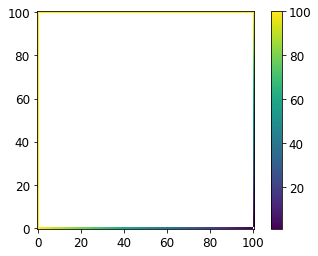

In [15]:
# Mask points with psi = 0
plt.imshow(np.where(psi>0, psi, np.nan), origin="lower")
plt.colorbar()
plt.show()

Set up and run SOR algorithm:

````{margin} Pseudocode for SOR algorithm
You can find a pseudocode version of the algorithm [here](https://en.wikipedia.org/wiki/Successive_over-relaxation#Algorithm). You may wish to rewrite the code in a way that suits you the most!!
````

In [16]:
a = 1.
b = 1.
c = 1.
d = 1.
e = -4.
f = 0.
w = 1.7

resid_crit = 1.0e-6

# Arbitrary value at the begining, higher than resid_crit
resid_ave = 100.

count = 0

while resid_ave > resid_crit:
    
    # Set at 0 so we can sum it up later
    resid_ave = 0. 

    # Set count for points in checker-boarding
    cnt_points = 0
    
    # Loop over internal points only
    for i in range(1,n-1):
        for j in range(1,n-1):
            
            # Checker-boarding
            if ((i+j)%2)==count%2:
                
                # Residual
                residual = a * psi[i+1,j] + b * psi[i-1,j] + c * psi[i,j+1]+ d * psi[i,j-1] + e * psi[i,j] - f
                
                # Update psi value
                psi[i,j] += -w*residual/e
                
                # Update resid_ave as a sum of residuals
                resid_ave += abs(residual) 
                
                cnt_points += 1
    
    #  Get average residual
    resid_ave = resid_ave/cnt_points
    
    # Print every 1000-dth residual
    if count%1000==0:
        print("Residual: %.7f" % resid_ave)
    
    # Count iterations
    count = count + 1

print("\n")
print("SOR conducted a total of %g iterations to obtain approximate solution." % count)
print("Final residual: %.7f" % resid_ave)

Residual: 3.0605999
Residual: 0.0400534
Residual: 0.0023906
Residual: 0.0001427
Residual: 0.0000085


SOR conducted a total of 4761 iterations to obtain approximate solution.
Final residual: 0.0000010


The SOR algorithm solved for stream function \\(\psi\\) until convergence. We can plot the obtained stream function:

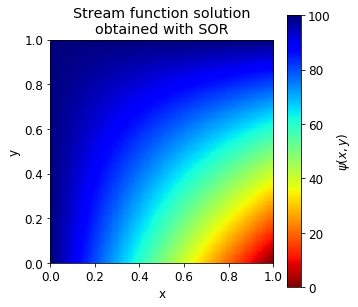

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(psi, origin="lower", extent=[0,1,0,1],
          cmap="jet_r")
plt.colorbar(label="$\psi(x,y)$")
plt.title("Stream function solution\nobtained with SOR")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect("equal")
plt.show()

Now that we have \\(\psi\\) in the whole domain, we can calculate flux vectors. In this case, flux vectors will represent current.

We can calculate fluxes inside the domain by central differences:
\\[f_{x\, i,j}=\frac{\psi_{i,j+1}-\psi_{i,j-1}}{2\Delta x},\\\\\\
f_{y\, i,j}=-\frac{\psi_{i+1,j}-\psi_{i-1,j}}{2\Delta x},\\]

remembering that \\(\Delta x=\Delta y\\).

At the lower boundary we can use central difference to calculate \\(x\\) component of the flux as it requires to use points in \\(y\\) direction. For the \\(y\\) component of the flux, we will need to use forward difference:
\\[f_{y\, i,0}=-\frac{\psi_{i,1}-\psi_{i,0}}{\Delta x}.\\]

Similiarly, at the upper boundary we must use backwards difference:
\\[f_{y\, i,n}=-\frac{\psi_{i,n}-\psi_{i,n-1}}{\Delta x}.\\]

At the left and right boundaries, the \\(x\\) component will be:
\\[f_{y\, 0,j}=\frac{\psi_{1,j}-\psi_{0,j}}{\Delta x},\\\\\\
f_{y\, n,j}=\frac{\psi_{n,j}-\psi_{n-1,j}}{\Delta x}.\\]

We can implement these formulae to calculate fluxes:

In [18]:
fx = np.zeros((n,n))
fy = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        if (i>=1 and i<n-1):
            fy[i,j] = -(psi[i+1,j]-psi[i-1,j])/(2.0*dx)
        elif (i>=1):
            fy[i,j] = -(psi[i,j]-psi[i-1,j])/dx
        else:
            fy[i,j] = -(psi[i+1,j]-psi[i,j])/dx
            
        if (j>=1 and j<n-1):
            fx[i,j] = (psi[i,j+1]-psi[i,j-1])/(2.0*dx)
        elif (j>=1):
            fx[i,j] = (psi[i,j]-psi[i,j-1])/dx
        else:
            fx[i,j] = (psi[i,j+1]-psi[i,j])/dx

If we overlay vector plot of fluxes on top of the stream function, we can observe that highest stream function value is in the upper left part of the domain, where the largest fluxes occur:

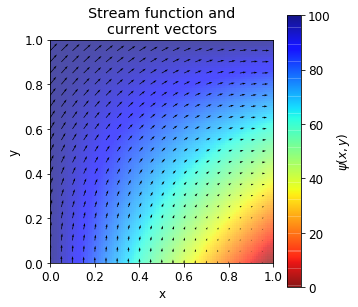

In [19]:
x = np.linspace(0,l,n)
X, Y = np.meshgrid(x,x)

plt.figure(figsize=(5,5))
plt.imshow(psi, origin="lower", extent=[0,1,0,1],
          cmap="jet_r", alpha=0.7)
plt.colorbar(label="$\psi(x,y)$")
plt.quiver(X[::5,::5], Y[::5,::5],
           np.rot90(-fx[::5,::5],2), np.rot90(-fy[::5,::5],2),
           scale=3000, width=0.003)
plt.title("Stream function and\ncurrent vectors")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect("equal")
plt.show()